In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [34]:
train_data = pd.read_csv(r'C:\Users\Dell\titanic_train.csv')
test_data  = pd.read_csv(r'C:\Users\Dell\titanic_train.csv')

In [35]:
def check_data(df,head=5):
    """
    Give you all information you need about your dataset
    
    Parameters:
    - df: Dataframe containing the data
    - head: The number of rows to appear
    
    Returns:
    - data info, sahpe, head, tail, missing values and descricption
    """
    print(20*"-" + "Information".center(20) + 20*"-")
    print(df.info())
    print(20*"-" + "Data Shape".center(20) + 20*"-")
    print(df.shape)
    print("\n" + 20*"-" + "The First 5 Data".center(20) + 20*"-")
    print(df.head())
    print("\n" + 20 * "-" + "The Last 5 Data".center(20) + 20 * "-")
    print(df.tail())
    print("\n" + 20 * "-" + "Missing Values".center(20) + 20 * "-")
    print(df.isnull().sum())
    print("\n" + 40 * "-" + "Describe the Data".center(40) + 40 * "-")
    print(df.describe([0.25, 0.5, 0.75,]).T)
    print("\n" + 20 * "-" + "Dublicated Data".center(20) + 20 * "-")
    print(df.duplicated().sum())
    
    
#You can call this function by passing in your dataframe
check_data(train_data)

--------------------    Information     --------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
--------------------     Data Shape     --------------------
(891, 12)

--------------------  The First 5 Data  --------------------
   PassengerId  Survived  Pclass  \
0        

In [36]:
check_data(test_data)

--------------------    Information     --------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
--------------------     Data Shape     --------------------
(891, 12)

--------------------  The First 5 Data  --------------------
   PassengerId  Survived  Pclass  \
0        

In [37]:
train_data['Title'] = train_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
test_data['Title'] = test_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [38]:
train_data['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [39]:
train_data['Title'] = train_data['Title'].replace(['Dr', 'Rev', 'Major', 'Col', 'Capt', 'Sir', 'Lady', 'Don', 'Jonkheer', 'Countess', 'Mme', 'Ms', 'Mlle','the Countess' ], 'Other')

test_data['Title'] = test_data['Title'].replace(['Dr', 'Rev', 'Major', 'Col', 'Capt', 'Sir', 'Lady', 'Don', 'Jonkheer', 'Countess', 'Mme', 'Ms', 'Mlle','the Countess','Dona'], 'Other')

In [40]:
train_data['Title'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Other      27
Name: Title, dtype: int64

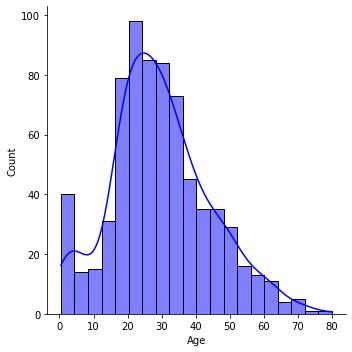

In [41]:
sns.displot(data = train_data['Age'] , kde = True , color = 'Blue')

In [42]:
# Set values in the Age column that are below 1 and above 0 to 1
# Fill nan values with the median of age column and ceil it
train_data['Age'] = train_data['Age'].clip(lower=1)
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())
train_data['Age'] = train_data['Age'].astype(int)

test_data['Age'] = test_data['Age'].clip(lower=1)
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())
test_data['Age'] = test_data['Age'].astype(int)

In [43]:
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

In [44]:
list(train_data["Embarked"].unique())

['S', 'C', 'Q', nan]

In [45]:
# Fill nan values with the mode of embarked column
mode_ = train_data['Embarked'].mode()[0]
train_data['Embarked'] = train_data['Embarked'].fillna(mode_)
test_data['Embarked'] = test_data['Embarked'].fillna(mode_)

In [46]:
print("\n" + 20 * "-" + "Missing Values".center(20) + 20 * "-")
print(train_data.isnull().sum() , "\n")
print(test_data.isnull().sum())


--------------------   Missing Values   --------------------
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64


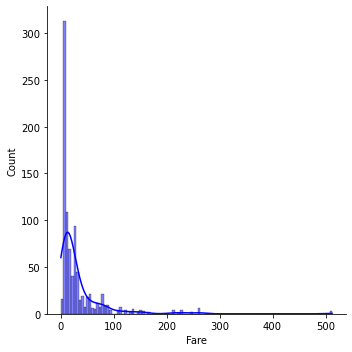

In [47]:
sns.displot(data = train_data['Fare'] , kde = True , color = 'Blue')

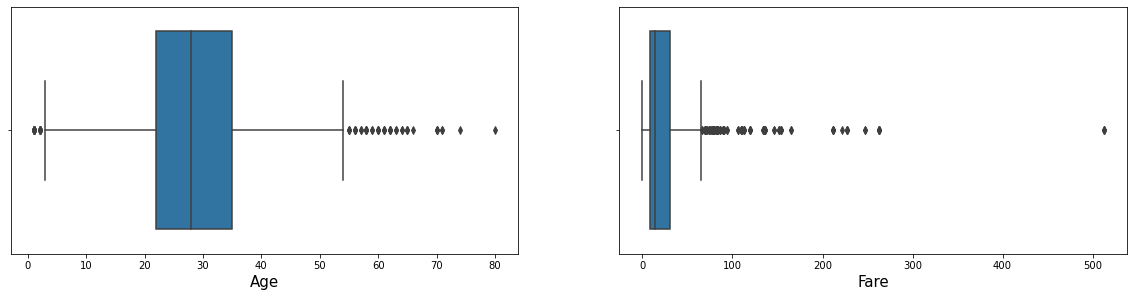

In [48]:
#see the boxplot to sure that there are outliers or no
cols=[ 'Age' , 'Fare']

plt.figure(figsize=(20,10))
for i,col in enumerate(cols):
    plt.subplot(2,2,i+1)
    sns.boxplot(data=train_data,x=col)
    plt.xlabel(col, fontsize=15)
    plt.xticks(fontsize=10)

In [49]:
bins = [0, 12, 18, 30, 50, 100]
labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
train_data['Age_rank'] = pd.cut(train_data['Age'], bins=bins, labels=labels)
test_data["Age_rank"] = pd.cut(test_data['Age'], bins=bins, labels = labels)

In [50]:
train_data["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [51]:
train_data["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [52]:
# Extract titles from names
train_data['Family_size'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['Family_size'] = test_data['SibSp'] + test_data['Parch'] + 1

In [53]:
#first we will drop cabin column cause it has many missing values and PassengerId column
train_data.drop(labels = ['Cabin' , 'Name' , 'Ticket' , 'SibSp' , 'Parch'] , axis = 1 , inplace = True  )
test_data.drop(labels = ['Cabin' , 'Name' , 'Ticket' ,'SibSp' , 'Parch'] , axis = 1 , inplace = True  )

In [54]:
train_data["Family_size"].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Family_size, dtype: int64

In [55]:
train_data

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Age_rank,Family_size
0,1,0,3,male,22,7.2500,S,Mr,Young Adult,2
1,2,1,1,female,38,71.2833,C,Mrs,Adult,2
2,3,1,3,female,26,7.9250,S,Miss,Young Adult,1
3,4,1,1,female,35,53.1000,S,Mrs,Adult,2
4,5,0,3,male,35,8.0500,S,Mr,Adult,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27,13.0000,S,Other,Young Adult,1
887,888,1,1,female,19,30.0000,S,Miss,Young Adult,1
888,889,0,3,female,28,23.4500,S,Miss,Young Adult,4
889,890,1,1,male,26,30.0000,C,Mr,Young Adult,1


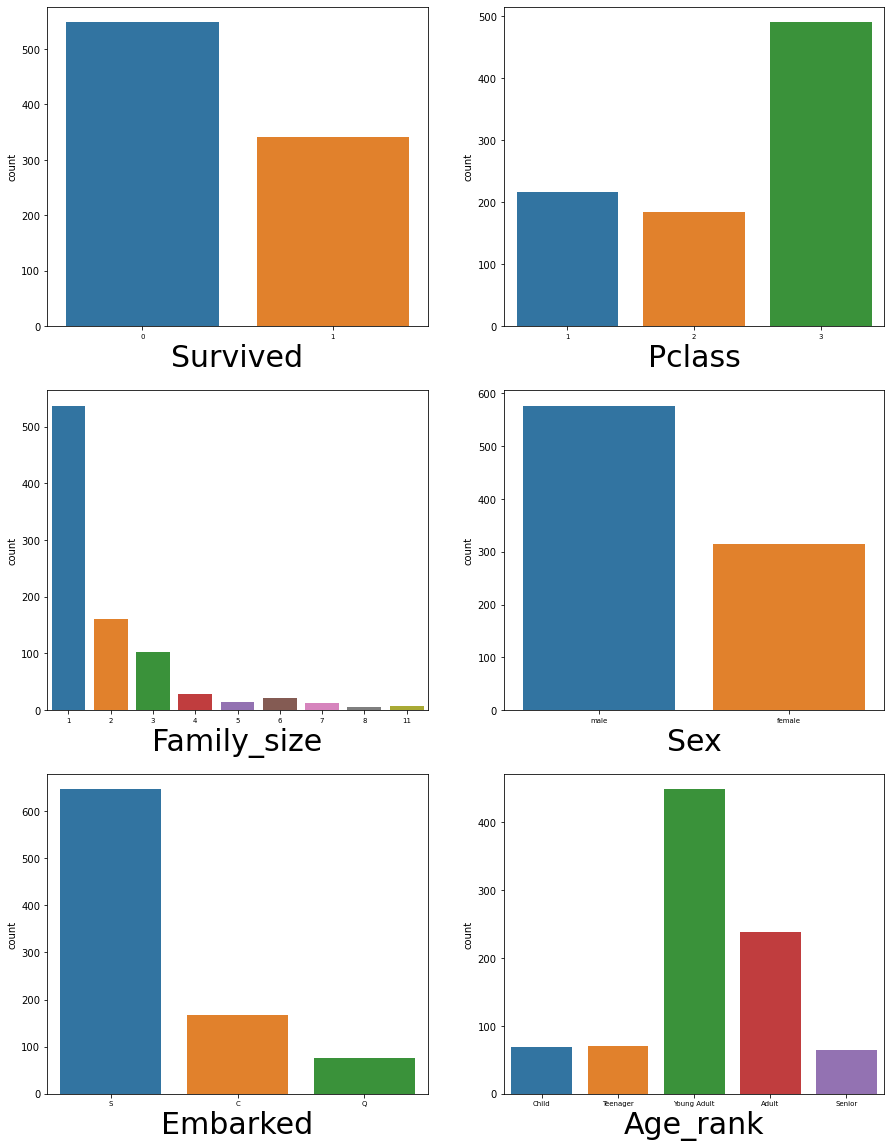

In [56]:
#see our data countplot plot distribution
cols=['Survived' , 'Pclass' , 'Family_size' , 'Sex' , 'Embarked' , 'Age_rank' ]
plt.figure(figsize=(15,20))
sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)
for i,col in enumerate(cols):
    plt.subplot(3,2,i+1)
    sns.countplot(data=train_data,x=col )
    plt.xlabel(col, fontsize=30)
    plt.xticks(fontsize=7 )

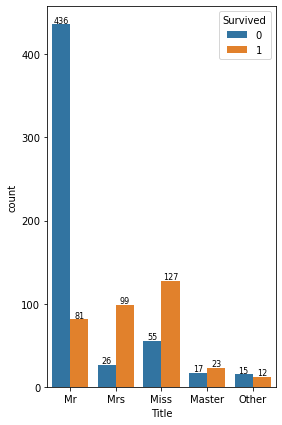

In [57]:
plt.figure(figsize=(9,7))
ax = plt.subplot(1,2,1)
fg = sns.countplot(data=train_data, hue='Survived', x='Title')
for p in fg.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 2, '{:.0f}'.format(height), ha="center", fontsize=8)

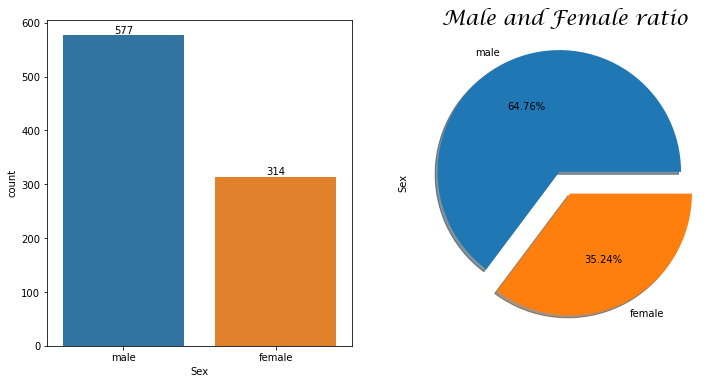

In [58]:
plt.figure(figsize=(12,6))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Sex', data = train_data)
ax.bar_label(ax.containers[0])
ax =plt.subplot(1,2,2)
ax=train_data['Sex'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Sex", fontsize = 40,color='Black',font='Lucida Calligraphy');

plt.title("Male and Female ratio", fontsize=20)
plt.show()


<Figure size 1440x1080 with 0 Axes>

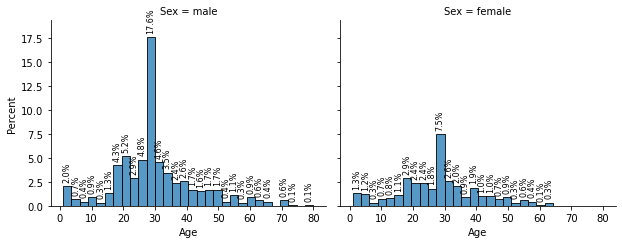

In [59]:
plt.figure(figsize=(20,15))
fg = sns.displot(data=train_data, x='Age', stat='percent', col='Sex', height=3.5, aspect=1.25)

for ax in fg.axes.ravel():
    
    # add annotations
    for c in ax.containers:

        # custom label calculates percent and add an empty string so 0 value bars don't have a number
        labels = [f'{w:0.1f}%' if (w := v.get_height()) > 0 else '' for v in c]

        ax.bar_label(c, labels=labels, label_type='edge', fontsize=8, rotation=90, padding=4)
    
    ax.margins(y=0.1)

plt.show()

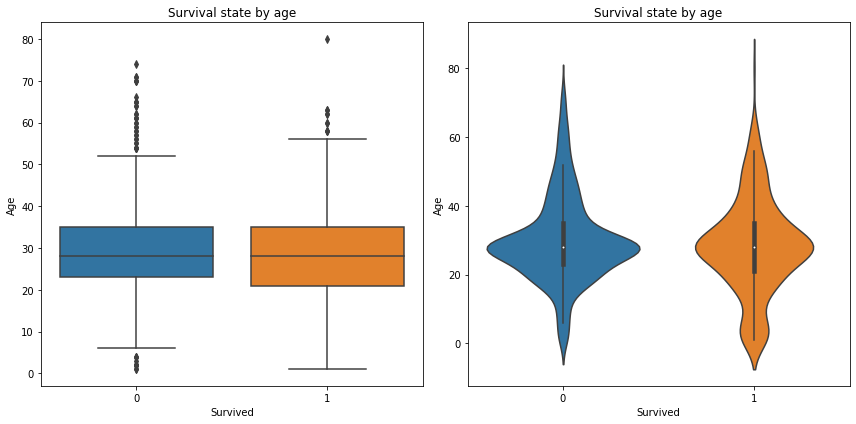

In [60]:
plt.figure(figsize=(12,6))

ax = plt.subplot(1 , 2 , 1)
sns.boxplot(data = train_data , x = 'Survived' , y = 'Age')
plt.title('Survival state by age')


plt.subplot(1 , 2 , 2)
sns.violinplot(data = train_data , x = 'Survived' , y = 'Age' )
plt.title('Survival state by age')

plt.tight_layout()
plt.show()

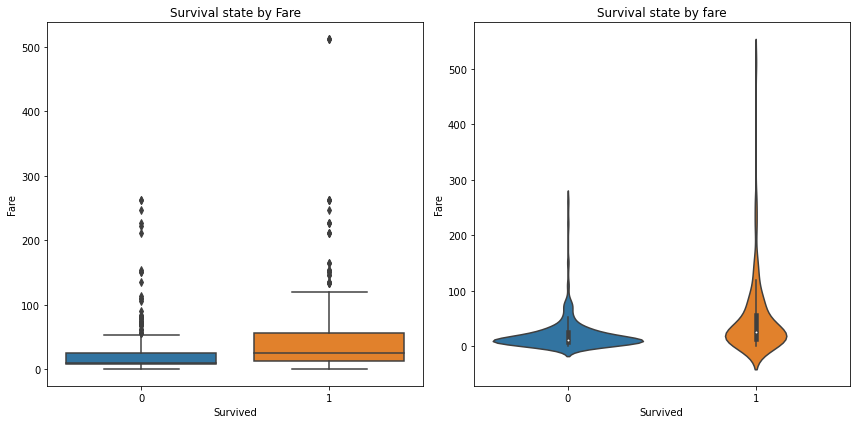

In [61]:
plt.figure(figsize=(12,6))

ax = plt.subplot(1 , 2 , 1)
sns.boxplot(data = train_data , x = 'Survived' , y = 'Fare')
plt.title('Survival state by Fare')


plt.subplot(1 , 2 , 2)
sns.violinplot(data = train_data , x = 'Survived' , y = 'Fare' )
plt.title('Survival state by fare')

plt.tight_layout()
plt.show()

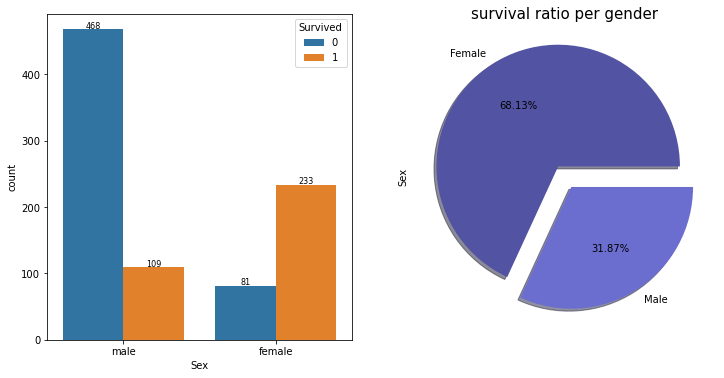

In [62]:
# see countplot distribution between Survived and Sex 
plt.figure(figsize=(12,6))
ax = plt.subplot(1,2,1)
fg = sns.countplot(data=train_data, hue='Survived', x='Sex')
for p in fg.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 2, '{:.0f}'.format(height), ha="center", fontsize=8)

    
ax =plt.subplot(1,2,2)
cmap = plt.get_cmap("tab20b")
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))
survived = train_data[train_data['Survived'] == 1]
ax=survived['Sex'].value_counts().plot.pie(labels = ['Female','Male'],explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True , colors = inner_colors);
ax.set_title(label = "survival ratio per gender", fontsize =15,color='Black');

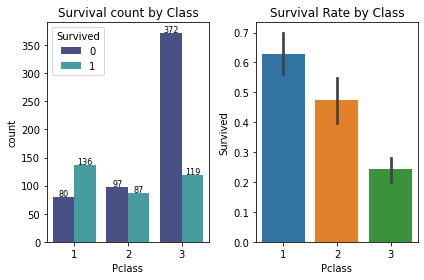

In [63]:
#see barplot distribution between Survived Pclass
ax = plt.subplot(1,2,1)
fg = sns.countplot(data=train_data, hue='Survived', x='Pclass' ,palette = "mako")
for p in fg.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 2, '{:.0f}'.format(height), ha="center", fontsize=8)
plt.title('Survival count by Class')

plt.subplot(1, 2, 2)
sns.barplot(data  = train_data , y = 'Survived' , x = 'Pclass')
plt.title('Survival Rate by Class')
plt.tight_layout()
plt.show()

In [64]:
survived['Embarked'].value_counts()

S    219
C     93
Q     30
Name: Embarked, dtype: int64

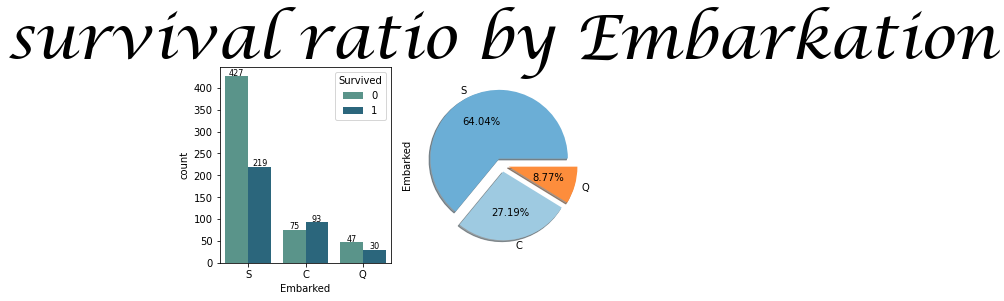

In [65]:
#see barplot distribution between Survived and Embarked
ax = plt.subplot(1,2,1)
fg = sns.countplot(data=train_data, hue='Survived', x='Embarked' ,palette = "crest")
for p in fg.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 2, '{:.0f}'.format(height), ha="center", fontsize=8)

    
bx =plt.subplot(1,2,2)
cmap = plt.get_cmap("tab20c")
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))
survived = train_data[train_data['Survived'] == 1]
bx=survived['Embarked'].value_counts().plot.pie(labels = ['S' , 'C' , 'Q'] ,explode=[0.1, 0.1 , 0.1],autopct='%1.2f%%',shadow=True  , colors = inner_colors);
bx.set_title(label = "survival ratio by Embarkation", fontsize =60,color='Black',font='Lucida Calligraphy');
plt.tight_layout()
plt.show()


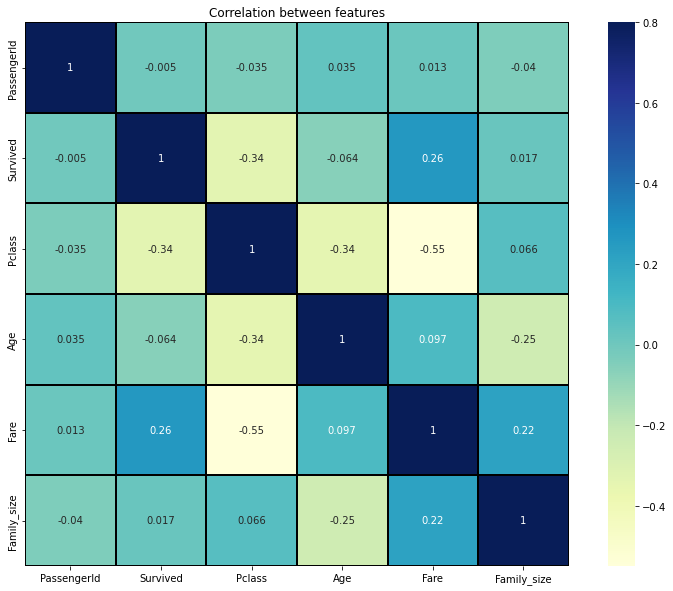

In [66]:
corr=train_data.corr()#["Survived"]
plt.figure(figsize=(14, 10))
sns.heatmap(corr, vmax=.8, linewidths=0.01, square=True,annot=True,cmap='YlGnBu',linecolor="black")
plt.title('Correlation between features')
plt.show()

Text(0.5, 1.0, 'Survival count by Sibling')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


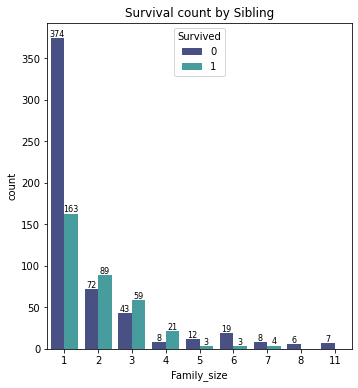

In [67]:
plt.figure(figsize=(12,6))
ax = plt.subplot(1,2,1)
fg = sns.countplot(data=train_data, hue='Survived', x='Family_size' ,palette = "mako")
for p in fg.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 2, '{:.0f}'.format(height), ha="center", fontsize=8)
plt.title('Survival count by Sibling')

In [68]:
train_data["Age_rank"].value_counts()

Young Adult    449
Adult          239
Teenager        70
Child           69
Senior          64
Name: Age_rank, dtype: int64

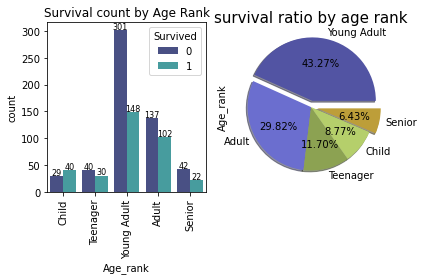

In [69]:
ax = plt.subplot(1,2,1)
fg = sns.countplot(data=train_data, hue='Survived', x='Age_rank' ,palette = "mako")
for p in fg.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 2, '{:.0f}'.format(height), ha="center", fontsize=8)
plt.xticks(rotation = 90)    
plt.title('Survival count by Age Rank')

bx =plt.subplot(1,2,2)
cmap = plt.get_cmap("tab20b")
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))
survived = train_data[train_data['Survived'] == 1]
bx=survived['Age_rank'].value_counts().plot.pie(labels = ['Young Adult' , 'Adult' , 'Teenager' , 'Child' , 'Senior'] ,explode=[0.1,0,0,0,0.1],autopct='%1.2f%%',shadow=True  , colors = inner_colors);
bx.set_title(label = "survival ratio by age rank", fontsize =15,color='Black');

plt.tight_layout()
plt.show()

In [70]:
train_data

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Age_rank,Family_size
0,1,0,3,male,22,7.2500,S,Mr,Young Adult,2
1,2,1,1,female,38,71.2833,C,Mrs,Adult,2
2,3,1,3,female,26,7.9250,S,Miss,Young Adult,1
3,4,1,1,female,35,53.1000,S,Mrs,Adult,2
4,5,0,3,male,35,8.0500,S,Mr,Adult,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27,13.0000,S,Other,Young Adult,1
887,888,1,1,female,19,30.0000,S,Miss,Young Adult,1
888,889,0,3,female,28,23.4500,S,Miss,Young Adult,4
889,890,1,1,male,26,30.0000,C,Mr,Young Adult,1


In [71]:
train_data['Sex'] = train_data['Sex'].map({'female': 0, 'male': 1})
train_data['Embarked'] = train_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
train_data['Title'] = train_data['Title'].map({'Mr': 0, 'Miss': 1,'Mrs': 2,'Master' : 3,'Other' : 4})
train_data['Age_rank'] = train_data['Age_rank'].map({'Young Adult': 0, 'Adult': 1,'Teenager': 2,'Child' : 3,'Senior' : 4})


test_data['Sex'] = test_data['Sex'].map({'female': 0, 'male': 1})
test_data['Embarked'] = test_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
test_data['Title'] = test_data['Title'].map({'Mr': 0, 'Miss': 1,'Mrs': 2,'Master' : 3,'Other' : 4})
test_data['Age_rank'] = test_data['Age_rank'].map({'Young Adult': 0, 'Adult': 1,'Teenager': 2,'Child' : 3,'Senior' : 4})

In [72]:
# Create a new feature indicating whether the passenger was travelling alone or with family
train_data['IsAlone'] = train_data['Family_size'].apply(lambda x: 1 if x == 1 else 0)
test_data['IsAlone'] = test_data['Family_size'].apply(lambda x: 1 if x == 1 else 0)

In [73]:
Passenger_Id  = test_data["PassengerId"]

In [74]:
test_data.drop(['PassengerId'], axis=1 , inplace=True)

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# For Evaluation 
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,f1_score,recall_score,precision_score
from time import time

In [76]:
X = train_data[['Pclass', 'Sex', 'Age','Fare', 'Embarked','Title' , 'Age_rank', 'Family_size' , 'IsAlone']]
y = train_data["Survived"]

In [77]:
# Split the data into train, validation, and test sets
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

In [78]:
model_params = {
    'Logistic Regression': {
        'model': LogisticRegression(random_state=42),
        'params': {
            'C': [0.1, 1, 10],
            'solver': ['newton-cg', 'lbfgs', 'liblinear']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'max_depth': [5, 10, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 500, 1000],
            'max_depth': [5, 10, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'Support Vector Machine': {
        'model': SVC(random_state=42),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'degree': [2, 3, 4],
            'gamma': ['scale', 'auto']
        }
    },
        'Gradient Boosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 500, 1000],
            'learning_rate': [0.001, 0.01, 0.1],
            'max_depth': [3, 5, 10],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'subsample': [0.5, 0.75, 1.0],
            'max_features': ['sqrt', 'log2', None]
        }
    },
    'MLP Classifier': {
        'model': MLPClassifier(random_state=42),
        'params': {
            'hidden_layer_sizes': [(10,), (50,), (100,)],
            'activation': ['relu', 'logistic']
        }
    }
 }

In [ ]:
# Train and evaluate each model using randomized search
scores = []
for name, mp in model_params.items():
    clf = RandomizedSearchCV(mp['model'], mp['params'], cv=5, random_state=42, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': name,
        'best score': clf.best_score_,
        'best params': clf.best_params_
    })

# Display the results in a table
df = pd.DataFrame(scores, columns=['model', 'best score', 'best params'])
df.sort_values(by=['best score'], ascending=False, inplace=True)
df

In [ ]:
# Define a list of models to train
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('GradientBoostingClassifier', GradientBoostingClassifier(random_state=42)),
    ('LogisticRegression', LogisticRegression(random_state=42))
    
]

# Train and evaluate each model
for name, model in models:
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict the validation set
    y_val_pred = model.predict(X_val)
    
    # Evaluate the model
    accuracy = accuracy_score(y_val, y_val_pred)
    print(f'{name}: Accuracy = {accuracy:.2f}')

    
    # Predict the test set and report the final accuracy
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f'{name}: Test Accuracy = {test_accuracy:.2f}\n')
    
    #precision = precision_score(y_test , y_val_pred)
    #recall = recall_score(y_test , y_val_pred)
    #f1 = f1_score(y_test,y_val_pred) 
    #print('precision: {0:.2f}, recall: {1:.2f}, F1: {2:.2f},'.format(precision, recall, f1))
    print(classification_report(y_val, y_val_pred))

In [ ]:
train_data

In [ ]:
test_data

In [ ]:
gb_model = GradientBoostingClassifier(random_state=42)

gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(test_data)

In [ ]:
#Create submission file
submission = pd.DataFrame({
    "PassengerId": Passenger_Id,
    "Survived": y_pred_gb
    })
submission.to_csv("submission.csv", index=False)

NameError: name 'GradientBoostingClassifier' is not defined

NameError: name 'pd' is not defined